This notebook is an analysis to the fluorescence response of voltage-sensitive type-II nanorods in sponteneous spikinig HEK cells simultaneously labeled with voltage-sensitive dye, BeRST. <br\>
The raw data is a fluorescence movie acquired by EMCCD. The field-of-view is splited by an opto-split into two parts, BeRST and nanorods on the left and right, respectively. <br\> 

## Define file path

In [1]:
from sys import platform
if platform.startswith('win'):
    prePath = 'G:/google drive/'
elif platform == 'darwin':
    prePath = '/Users/yungkuo/Google Drive/'

In [2]:
fpath = prePath + 'HFSP internal sharing space/Data/spiking HEK cell data/' # path of folder
fname = 'berst 6B dual r b ex_3' # file name of fluorescence movie without .tif

In [3]:
framerate = 31.221 #Hz, camera framerate

## Import functions

In [4]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import tifffile as tff
import ROI
from IPython.display import display

In [5]:
#from sys import platform
#if platform == 'darwin':
#    %config InlineBackend.figure_format = 'retina'

## Import movie

In [6]:
tiffimg = tff.TiffFile(fpath+fname+'.tif')
movie = tiffimg.asarray()
print('movie size = {}'.format(movie.shape))

movie size = (3000, 512, 512)


### Mean intensity of all the pixels as function of time 

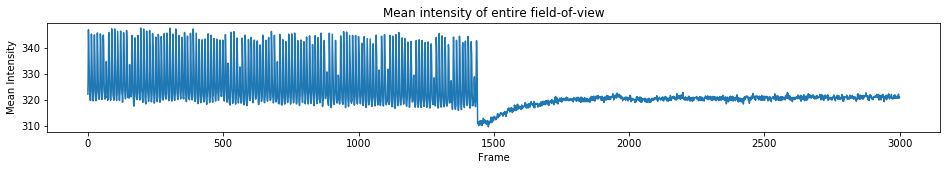

In [7]:
plt.figure(figsize=(16,2))
plt.plot(movie.mean(1).mean(1))
plt.title('Mean intensity of entire field-of-view')
plt.ylabel('Mean Intensity')
plt.xlabel('Frame')

### Plot mean fluorescence image

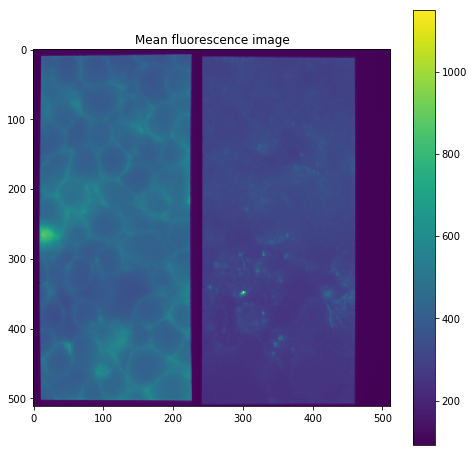

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(movie.mean(0), cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Mean fluorescence image')

### Define BeRST and NR regions

In [9]:
berst = (slice(None),slice(0,512),slice(10,220))
NR = (slice(None),slice(0,512),slice(250,450))

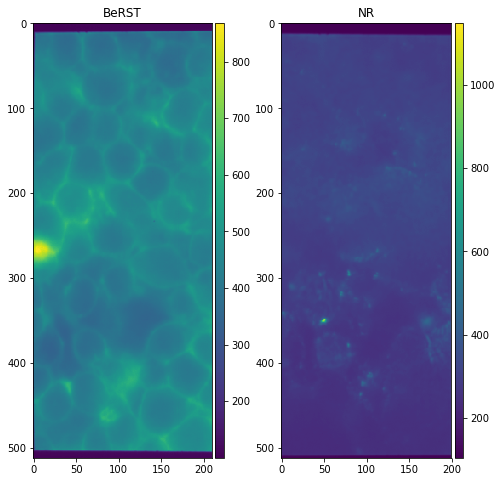

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
im = {}
fig, ax = plt.subplots(1,2, figsize=(8,8))
im['0'] = ax[0].imshow(movie[berst].mean(0), cmap='viridis', interpolation='none')
im['1'] = ax[1].imshow(movie[NR].mean(0), cmap='viridis', interpolation='none')

for i in range(2):
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im[str(i)], cax=cax)
ax[0].set_title('BeRST')
ax[1].set_title('NR')

### Plot mean intensity of entire BeRST or NR's field of view

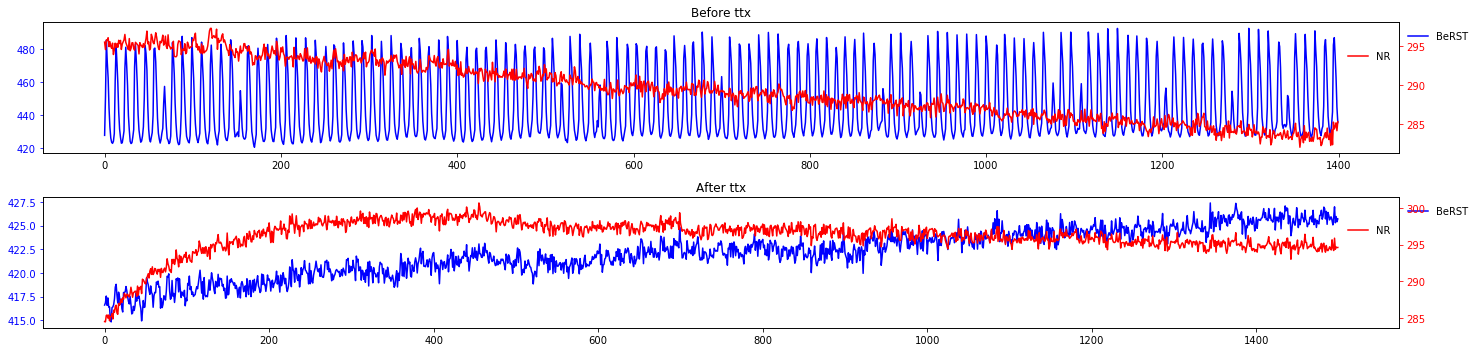

In [11]:
fig, ax = plt.subplots(2,figsize=(20,5))
ax[0].plot(movie[berst].mean(1).mean(1)[:1400],'b', label='BeRST')
axt0 = ax[0].twinx()
axt0.plot(movie[NR].mean(1).mean(1)[:1400], 'r', label='NR')

ax[1].plot(movie[berst].mean(1).mean(1)[1500:],'b', label='BeRST')
axt1 = ax[1].twinx()
axt1.plot(movie[NR].mean(1).mean(1)[1500:], 'r', label='NR')


ax[0].set_title('Before ttx')
ax[1].set_title('After ttx')
for i, (ax, color) in enumerate(zip([ax[0],axt0,ax[1],axt1], ['b','r','b','r'])):
    ax.legend(bbox_to_anchor=(1,1-0.15*(i%2)), frameon=False)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='y', colors=color)
fig.tight_layout()
plt.close(fig)
display(fig)

### Plot FFT of traces shown above befroe and after adding ttx

In [12]:
def get_fft(tt, framerate):
    sp = np.fft.fft(tt)
    freq = np.fft.fftfreq(tt.size, d=1./framerate)
    real_half = np.abs(sp.real)[:len(freq)//2]
    return freq[:len(freq)//2], real_half

In [13]:
def get_rfft(tt, framerate):
    sp = np.fft.rfft(tt)
    freq = np.fft.rfftfreq(tt.size, d=1./framerate)
    real = np.abs(sp.real)
    return freq, real

In [14]:
def get_rfft_wMirrorExt(tt, framerate, plot=False):
    tt2 = np.append(tt, tt[:0:-1])
    N = tt2.size
    sp = np.fft.rfft(tt2)
    freq = np.fft.rfftfreq(N, d=1./framerate)
    if plot:
        plt.figure()
        plt.plot(freq[1:], np.abs(sp[1:]))
    return freq, np.abs(sp)

### Test the FFT function with mirror extention works properly

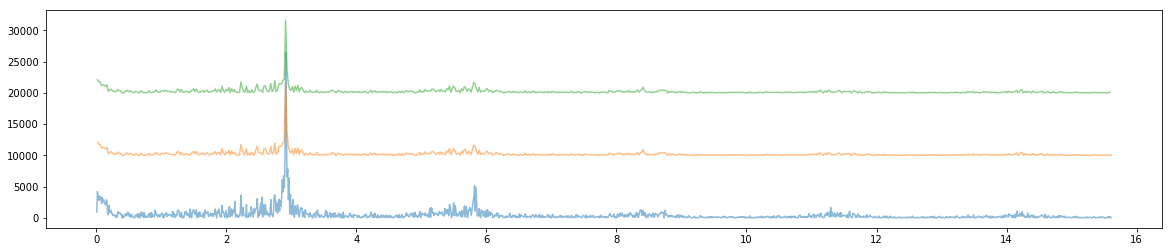

In [15]:
tt = movie[berst].mean(1).mean(1)[:1500]
plt.figure(figsize=(20,4))
plt.plot(get_rfft_wMirrorExt(tt, framerate)[0][1:], 
         get_rfft_wMirrorExt(tt, framerate)[1][1:], alpha=0.5)
plt.plot(get_rfft(tt, framerate)[0][1:], 
         get_rfft(tt, framerate)[1][1:]+10000, alpha=0.5)
plt.plot(get_fft(tt, framerate)[0][1:], 
         get_fft(tt, framerate)[1][1:]+20000, alpha=0.5)

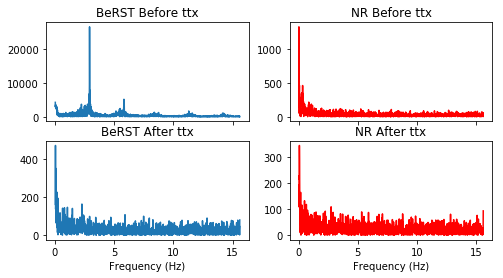

In [16]:
fig, ax = plt.subplots(2,2, figsize=(8,4), sharex=True)
ax[0,0].plot(get_rfft_wMirrorExt(movie[berst].mean(1).mean(1)[:1500], framerate)[0][2:], 
             get_rfft_wMirrorExt(movie[berst].mean(1).mean(1)[:1500], framerate)[1][2:])
ax[0,1].plot(get_rfft_wMirrorExt(movie[NR].mean(1).mean(1)[:1500], framerate)[0][2:], 
             get_rfft_wMirrorExt(movie[NR].mean(1).mean(1)[:1500], framerate)[1][2:], 'r')

ax[1,0].plot(get_rfft_wMirrorExt(movie[berst].mean(1).mean(1)[1700:], framerate)[0][2:], 
             get_rfft_wMirrorExt(movie[berst].mean(1).mean(1)[1700:], framerate)[1][2:])
ax[1,1].plot(get_rfft_wMirrorExt(movie[NR].mean(1).mean(1)[1700:], framerate)[0][2:], 
             get_rfft_wMirrorExt(movie[NR].mean(1).mean(1)[1700:], framerate)[1][2:], 'r')

ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,0].set_xlabel('Frequency (Hz)')

ax[0,1].set_title('NR Before ttx')
ax[0,0].set_title('BeRST Before ttx')
ax[1,1].set_title('NR After ttx')
ax[1,0].set_title('BeRST After ttx')

## SOFI2 image

In [17]:
acr_img = np.zeros((movie.shape[1], movie.shape[2]))
for i in range(movie.shape[1]):
    for j in range(movie.shape[2]):
        acr_img[i,j] = np.mean(ROI.get_acr(movie[:1400], [j,i], [0,0]))

In [19]:
tff.imsave(prePath+'sHEK analysis 040717/{}.tif'.format(fname), acr_img)
tiffimg = tff.TiffFile(prePath+'sHEK analysis 040717/{}.tif'.format(fname))
acr_img = tiffimg.asarray()

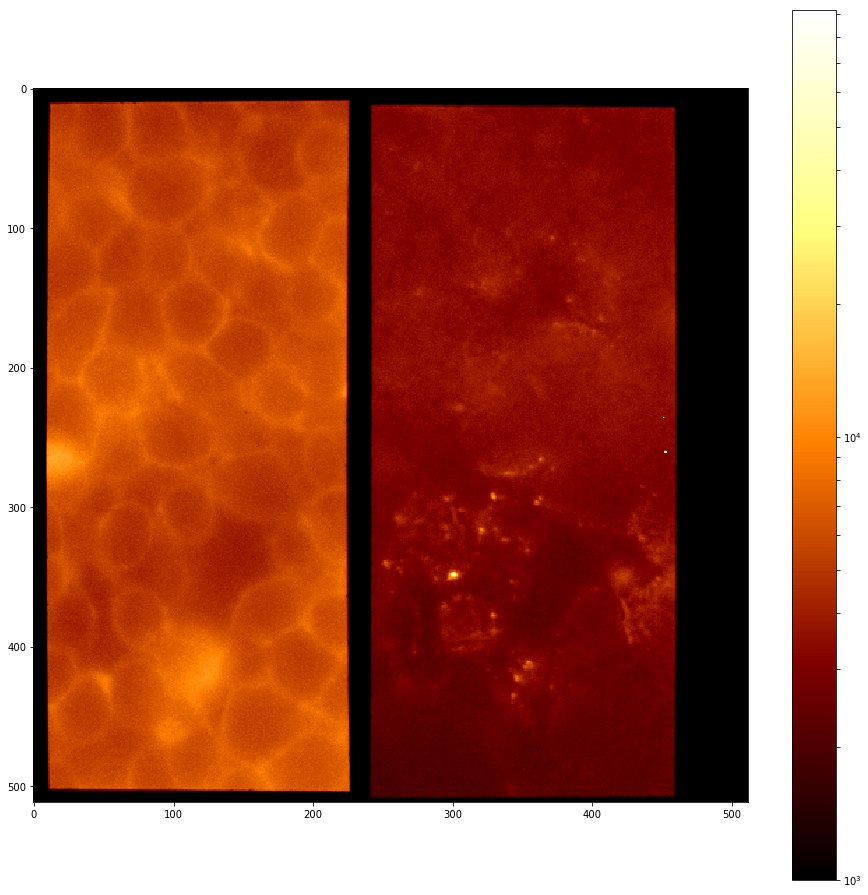

In [20]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(16,16))
plt.imshow(acr_img, cmap='afmhot', norm=LogNorm(vmin=1e3))
plt.colorbar()

## Find particles

In [21]:
scan = [3,3]
pts = ROI.finddot(acr_img[NR[1:]], scan, nstd=1.3)

In [22]:
pts

array([[  25.,   55.],
       [ 121.,  108.],
       [ 164.,  134.],
       [  72.,  140.],
       [  26.,  148.],
       [ 133.,  152.],
       [  80.,  216.],
       [ 112.,  216.],
       [  55.,  230.],
       [ 113.,  266.],
       [  89.,  276.],
       [  79.,  293.],
       [  45.,  294.],
       [ 110.,  297.],
       [  71.,  316.],
       [ 186.,  323.],
       [  87.,  324.],
       [ 104.,  331.],
       [  51.,  348.],
       [ 172.,  350.],
       [  92.,  353.],
       [  44.,  371.],
       [  79.,  378.],
       [  23.,  404.],
       [ 104.,  411.],
       [  96.,  423.],
       [  14.,  426.],
       [ 121.,  429.]])

In [23]:
pts = np.array([[  25.,   55.],
       [ 121.,  108.],
       [ 164.,  134.],
       [  72.,  140.],
       [  26.,  148.],
       [ 133.,  152.],
       [  80.,  216.],
       [ 112.,  216.],
       [  55.,  230.],
       [ 113.,  266.],
       [  89.,  276.],
       [  79.,  293.],
       [  45.,  294.],
       [ 110.,  297.],
       [  71.,  316.],
       [ 186.,  323.],
       [  87.,  324.],
       [ 104.,  331.],
       [  51.,  348.],
       [ 172.,  350.],
       [  92.,  353.],
       [  44.,  371.],
       [  79.,  378.],
       [  23.,  404.],
       [ 104.,  411.],
       [  96.,  423.],
       [  14.,  426.],
       [ 121.,  429.]])

In [24]:
len(pts)

28

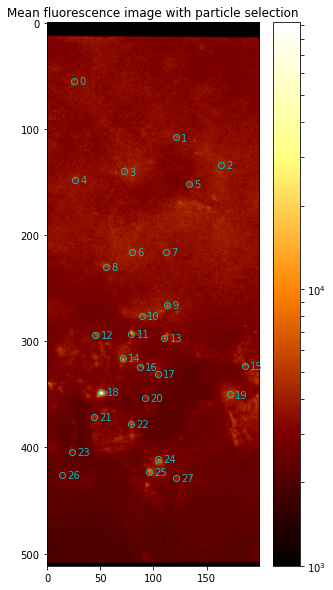

In [25]:
fig, ax = plt.subplots(figsize=(5,10))
ax.plot(pts[:,0], pts[:,1], 'co', fillstyle='none')
im = ax.imshow(acr_img[NR[1:]], cmap='afmhot', norm=LogNorm(vmin=1e3))
for count, pt in enumerate(pts):
    ax.annotate(count, xy=pt+[5,3], color='c', fontsize=10)

#ax.plot(pts_agg[:,0], pts_agg[:,1], 'ws', fillstyle='none', ms=16)
#for count, pt in enumerate(pts_agg):
#    ax.annotate(count, xy=pt+[5,3], color='w', fontsize=10)    
plt.colorbar(im)
plt.title('Mean fluorescence image with particle selection')

### Plot ROI as function of time

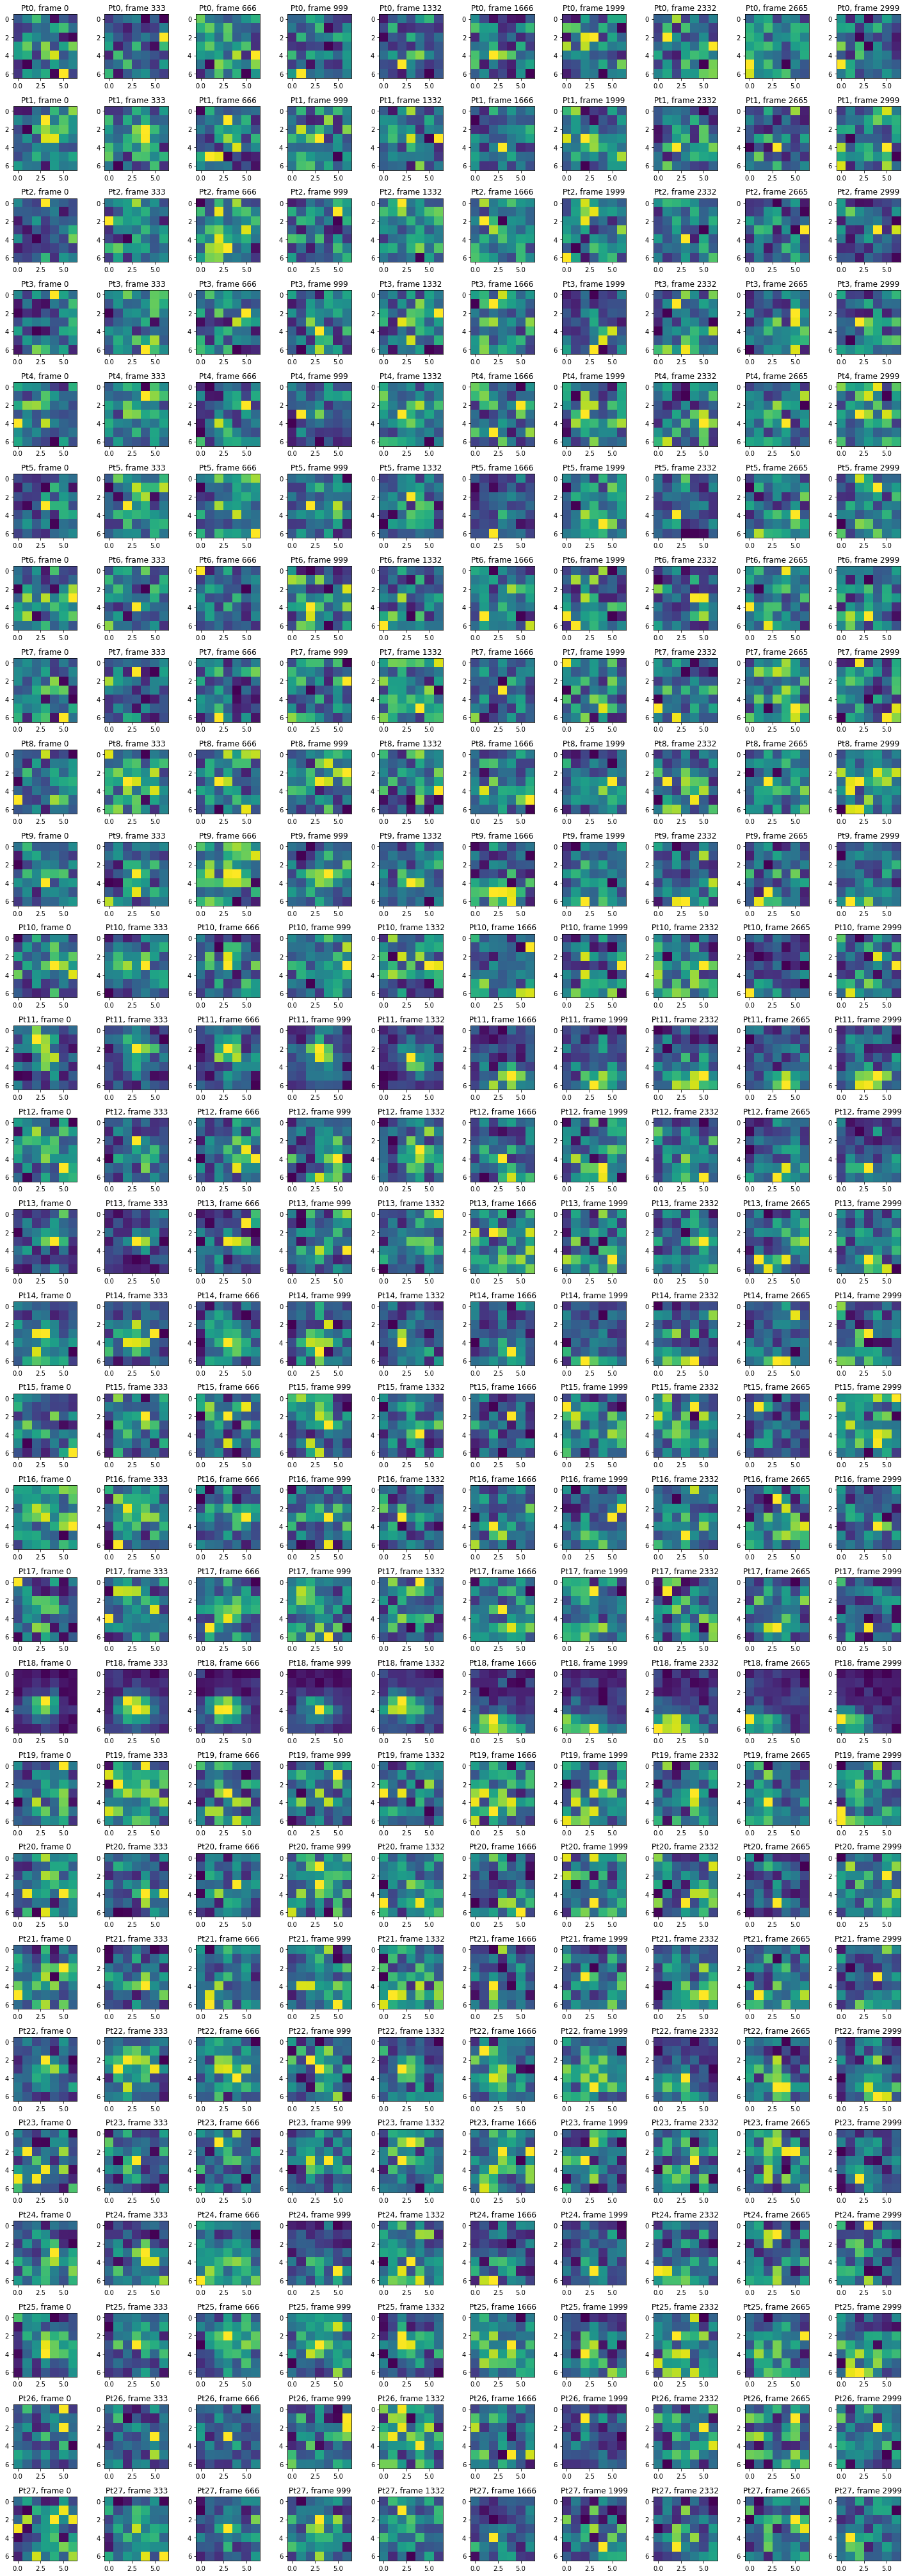

In [26]:
scam = [5,5]
fig, ax = plt.subplots(len(pts),10, figsize=(20,2*len(pts)))
for i in range(len(pts)):
    for count, f in enumerate(np.linspace(0,movie.shape[0]-1,10)):
        f = int(f)
        roi = ROI.get_roi_square_3d(pts[i], scan)
        ax[i,count].imshow(movie[NR][roi][f], cmap='viridis', interpolation='none')
        ax[i,count].set_title('Pt%d, frame %d' % (i,f))
fig.tight_layout()

### Plot ROI

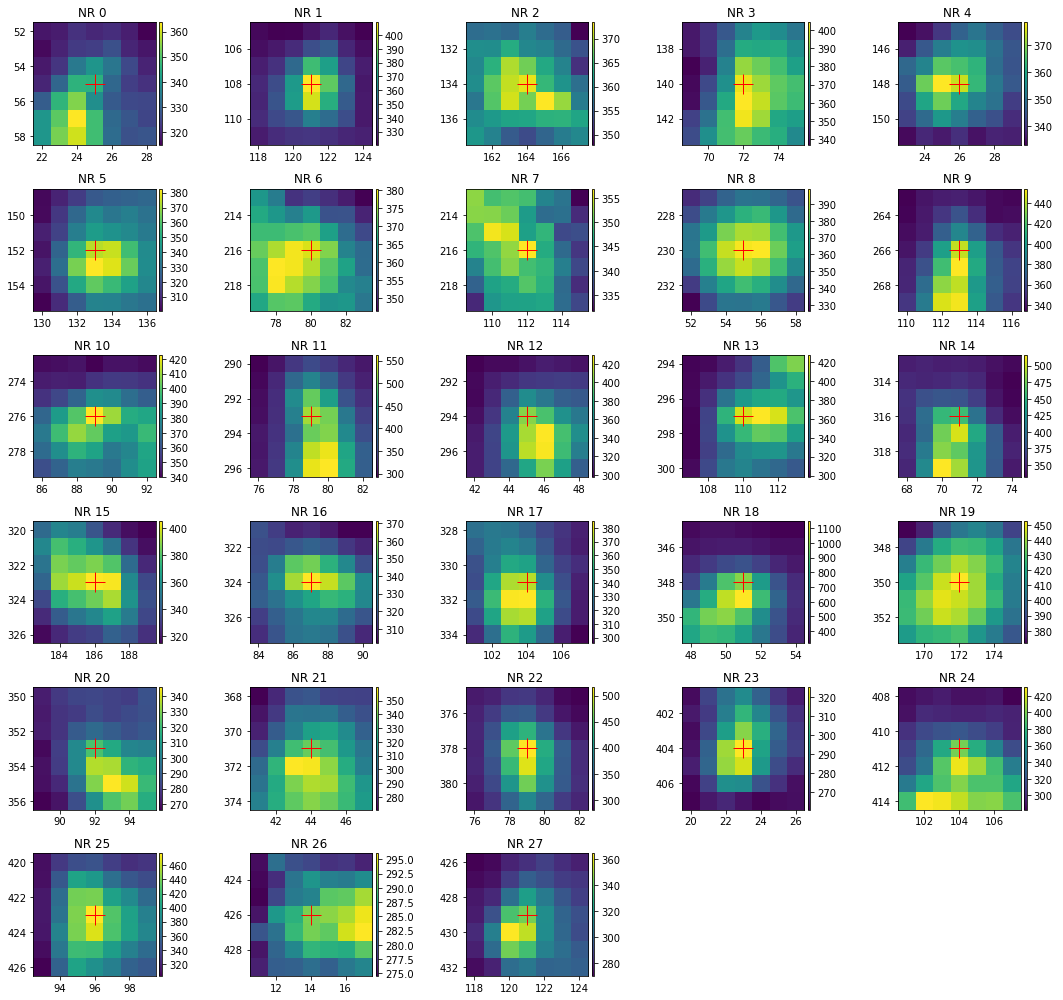

In [27]:
fig, ax = ROI.plot_roi(movie[NR].mean(0), pts, scan=[3,3], ncol=5)
display(fig)

### Find matching areas in both view

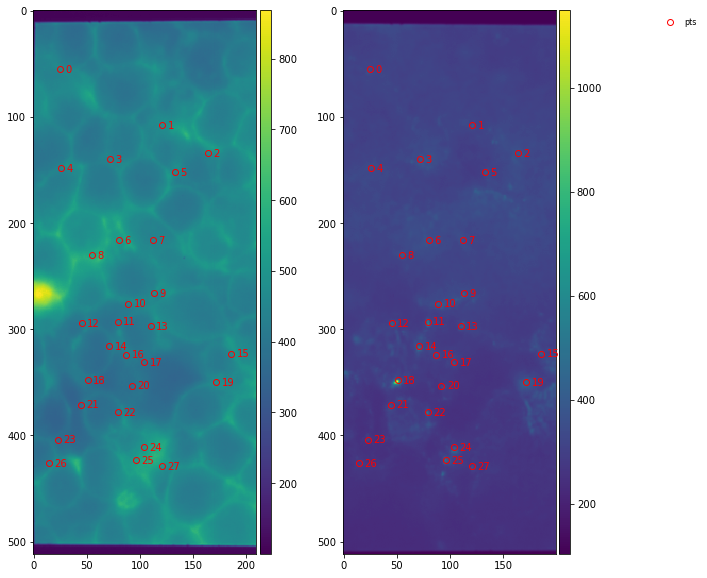

In [28]:
shift = (0,0)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].plot(pts[:,0]-shift[0], pts[:,1]-shift[1], 'ro', fillstyle='none', label='pts')
for count, pt in enumerate(pts):
    ax[0].annotate(count, xy=pt+[5,3]-shift, color='r', fontsize=10)

ax[1].plot(pts[:,0], pts[:,1], 'ro', fillstyle='none', label='pts')
for count, pt in enumerate(pts):
    ax[1].annotate(count, xy=pt+[5,3], color='r', fontsize=10)

im = {}
im['0'] = ax[0].imshow(movie[berst].mean(0), cmap='viridis', interpolation='none')
im['1'] = ax[1].imshow(movie[NR].mean(0), cmap='viridis', interpolation='none')
ax[1].legend(frameon=False, bbox_to_anchor=(1.7, 1), fontsize=8)
for i in range(2):
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im[str(i)], cax=cax)

### Plot ROIs selected in BeRST channel

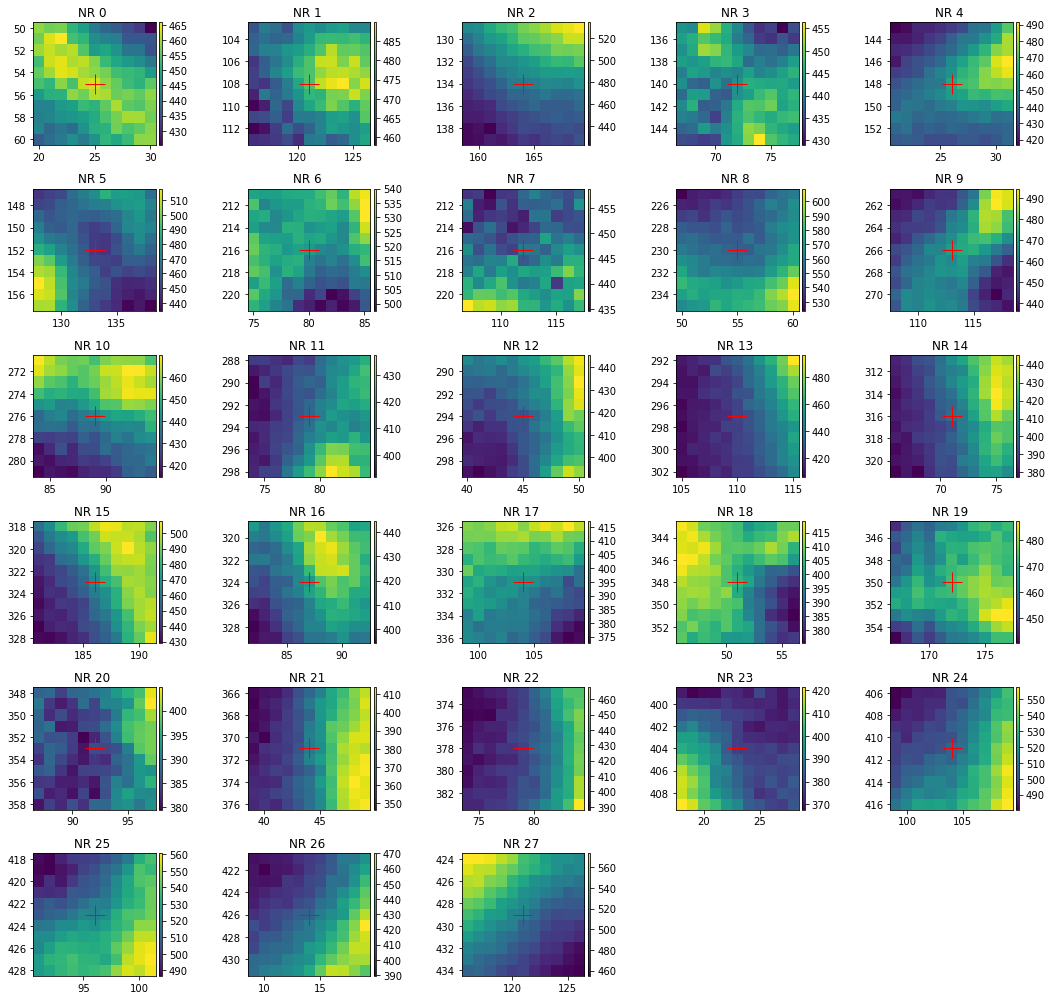

In [29]:
scan = [5,5]
fig, ax = ROI.plot_roi(movie[berst].mean(0), pts-shift, scan, ncol=5)
display(fig)

##### [Comments]
The NRs' position don't always collocalize with BeRST labeled membrane. The reason can be
1. The nanorods are not on the membrane
2. The two channels has slightly different magnification and aberration, so the matching cannot be satisfied by simple (dx,dy)

## Plot time trace of small particles (5x5 ROIs)

In [30]:
T = np.arange(0, movie.shape[0]/framerate, 1/framerate)

In [31]:
scan = [2,2]

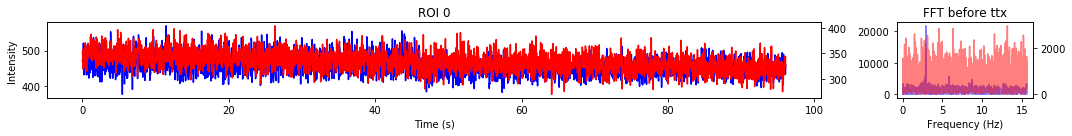

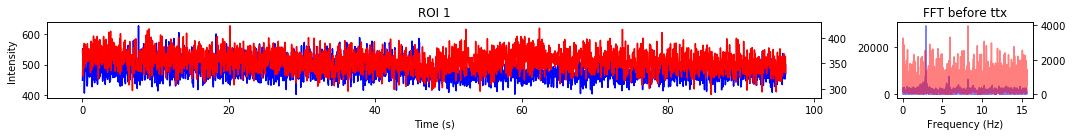

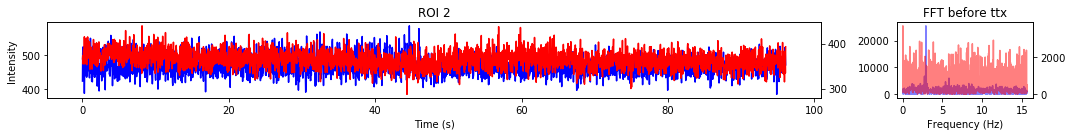

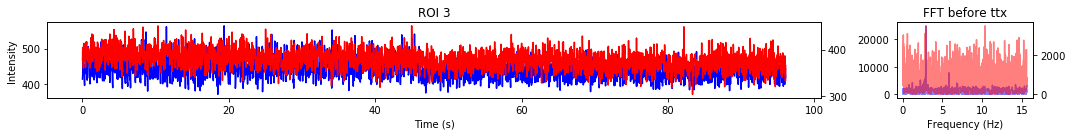

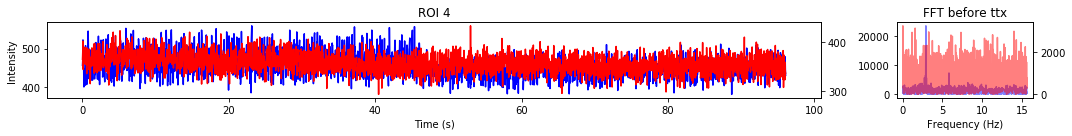

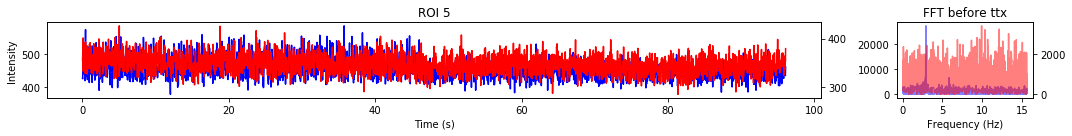

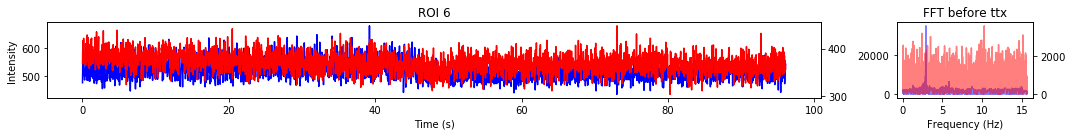

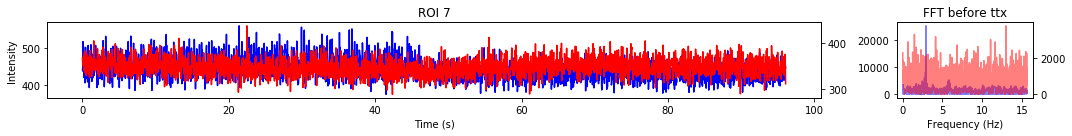

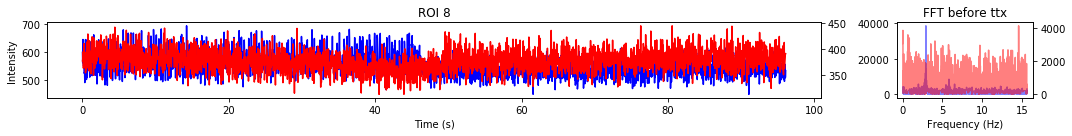

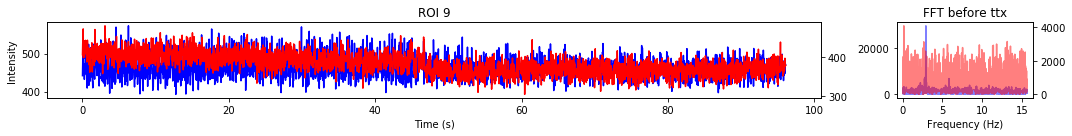

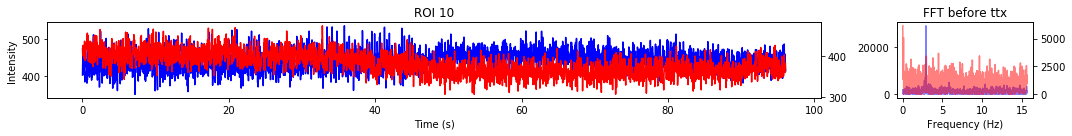

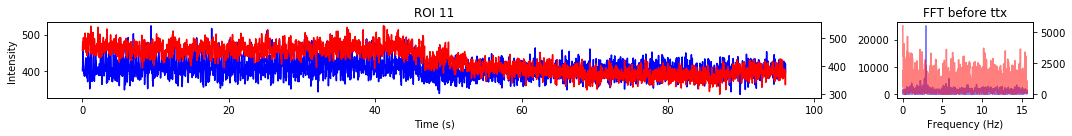

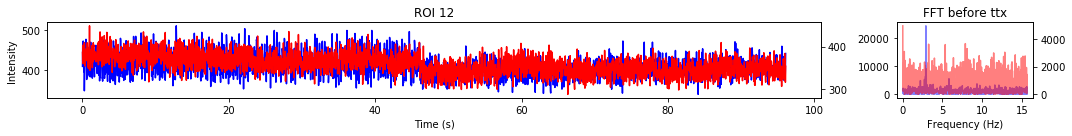

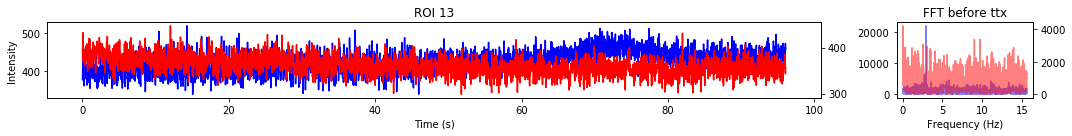

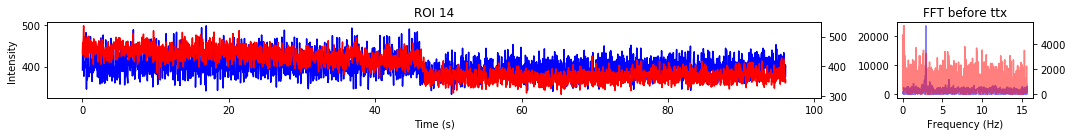

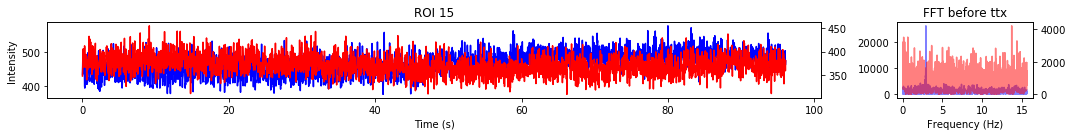

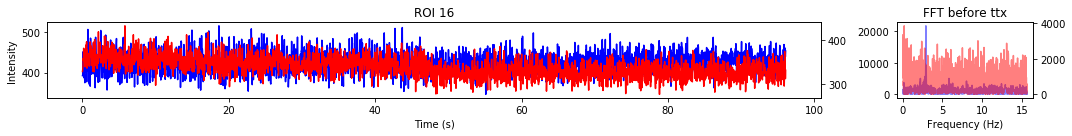

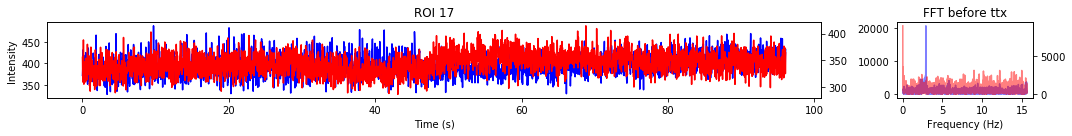

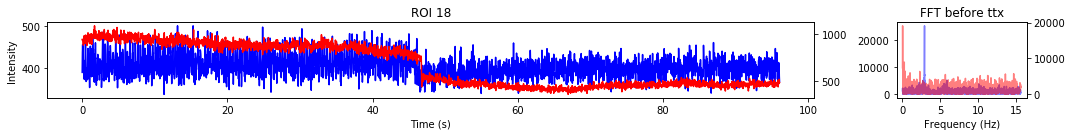

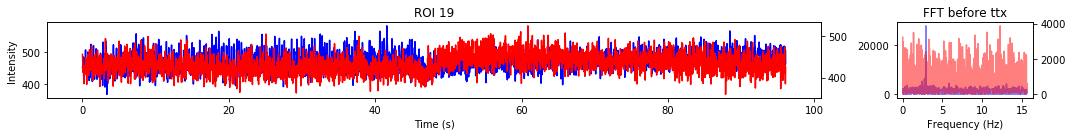

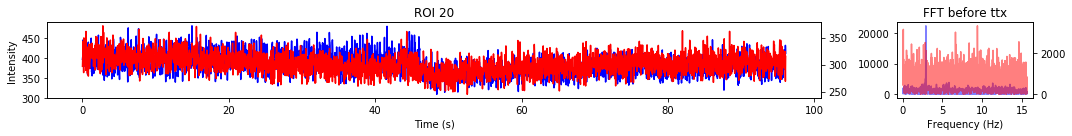

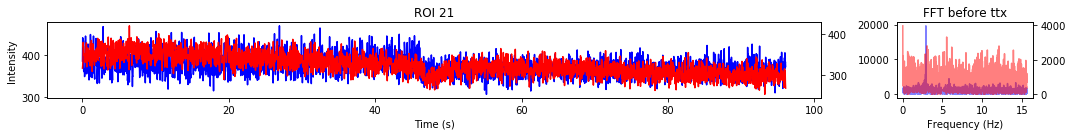

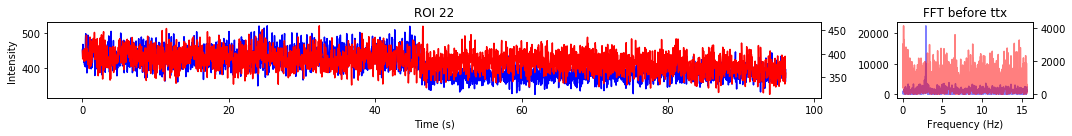

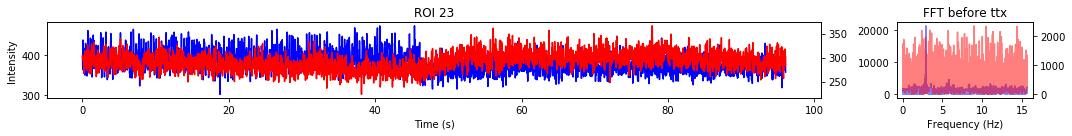

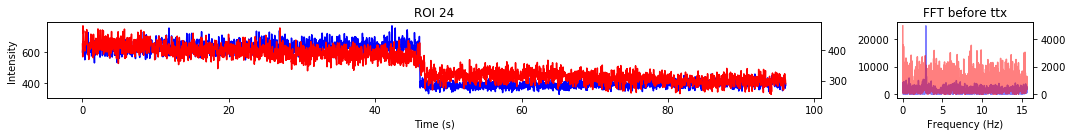

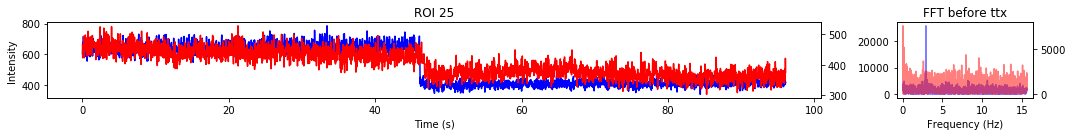

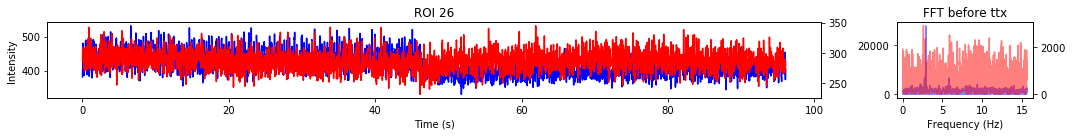

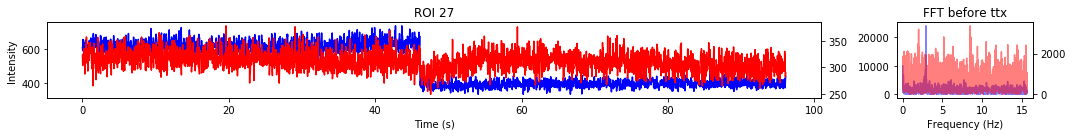

In [32]:
for count, pt in enumerate(pts):
    tt_NR = ROI.get_timetrace(movie[NR], pt, scan)
    tt_berst = ROI.get_timetrace(movie[berst], pt-shift, scan)
    
    
    fig, ax = plt.subplots(1,5, figsize=(15,2))
    ax[0] = plt.subplot2grid((1,5), (0,0), colspan=4, rowspan=1)
    ax[4] = plt.subplot2grid((1,5), (0,4), colspan=1, rowspan=1)
    ax[0].plot(T,tt_berst, 'b')
    ax1 = ax[0].twinx()
    ax1.plot(T,tt_NR, 'r')
    
    ax[4].plot(get_rfft_wMirrorExt(tt_berst[:1400], framerate)[0][2:], 
               get_rfft_wMirrorExt(tt_berst[:1400], framerate)[1][2:], 'b', alpha=0.5)
    ax5 = ax[4].twinx()
    ax5.plot(get_rfft_wMirrorExt(tt_NR[:1400], framerate)[0][2:], 
             get_rfft_wMirrorExt(tt_NR[:1400], framerate)[1][2:], 'r', alpha=0.5)
    
    ax[0].set_title('ROI %d' % count)
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Intensity')
    ax[4].set_title('FFT before ttx')
    ax[4].set_xlabel('Frequency (Hz)')
    fig.tight_layout()
    plt.close(fig)
    display(fig)

## Plot time trace autocorrelation

In [33]:
def get_ccr_fromtt(tt1, tt2):
    tt1 = tt1 - np.mean(tt1)
    tt2 = tt2 - np.mean(tt2)
    ccr = np.correlate(tt1, tt2, mode='full')
    #ccr = ccr[len(ccr)//2:]
    return ccr

In [34]:
scan

[2, 2]

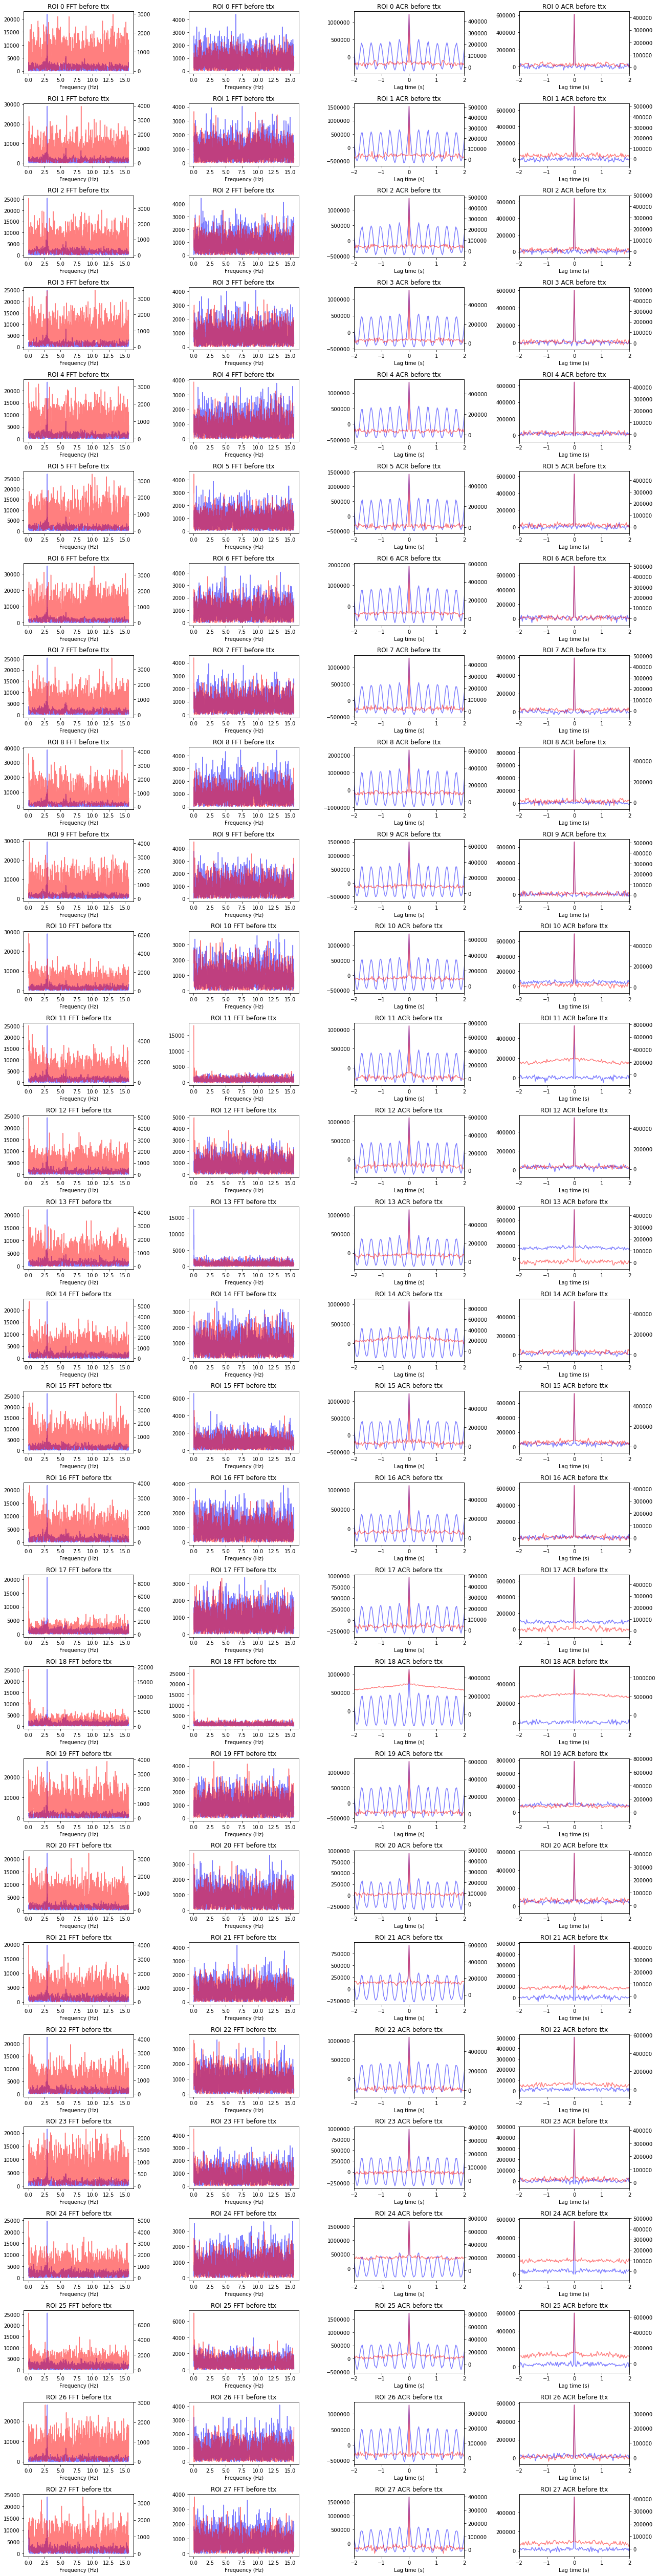

In [35]:
fig, ax = plt.subplots(len(pts),4, figsize=(18,len(pts)*2.5))
for count, pt in enumerate(pts):
    tt_NR = ROI.get_timetrace(movie[NR], pt, scan)
    tt_berst = ROI.get_timetrace(movie[berst], pt-shift, scan)
    
    ax[count,0].plot(get_rfft_wMirrorExt(tt_berst[:1400], framerate)[0][2:], 
               get_rfft_wMirrorExt(tt_berst[:1400], framerate)[1][2:], 'b', alpha=0.5)
    axt = ax[count,0].twinx()
    axt.plot(get_rfft_wMirrorExt(tt_NR[:1400], framerate)[0][2:], 
             get_rfft_wMirrorExt(tt_NR[:1400], framerate)[1][2:], 'r', alpha=0.5)
    ax[count,1].plot(get_rfft_wMirrorExt(tt_berst[1600:], framerate)[0][2:], 
               get_rfft_wMirrorExt(tt_berst[1600:], framerate)[1][2:], 'b', alpha=0.5)
    ax[count,1].plot(get_rfft_wMirrorExt(tt_NR[1600:], framerate)[0][2:], 
             get_rfft_wMirrorExt(tt_NR[1600:], framerate)[1][2:], 'r', alpha=0.5)
   


    acr_berst = get_ccr_fromtt(tt_berst[:1400],tt_berst[:1400])
    acr_NR = get_ccr_fromtt(tt_NR[:1400],tt_NR[:1400])
    tau = np.arange(-(len(acr_berst)-1)/2/framerate, (len(acr_berst)-1)/2/framerate, 1/framerate)
    
    ax[count,2].plot(tau, acr_berst, 'b', alpha=0.5)
    axt = ax[count,2].twinx()
    axt.plot(tau, acr_NR, 'r', alpha=0.5)
    
    acr_berst = get_ccr_fromtt(tt_berst[1600:],tt_berst[1600:])
    acr_NR = get_ccr_fromtt(tt_NR[1600:],tt_NR[1600:])
    
    ax[count,3].plot(tau, acr_berst, 'b', alpha=0.5)
    axt = ax[count,3].twinx()
    axt.plot(tau, acr_NR, 'r', alpha=0.5)
    
    for i in [0,1]:
        ax[count,i].set_title('ROI %d FFT before ttx' % count)
        ax[count,i].set_xlabel('Frequency (Hz)')
    for i in [2,3]:
        ax[count,i].set_title('ROI %d ACR before ttx' % count)
        ax[count,i].set_xlabel('Lag time (s)')
        ax[count,i].set_xlim(-2,2)
fig.tight_layout()

# Select ROIs that have FFT peak at 2.9Hz

In [36]:
fft = get_rfft_wMirrorExt(movie[berst].mean(1).mean(1)[:1400], framerate)

In [37]:
peaks_idx = np.array(np.where(fft[1] > 10000))
peaks_idx = peaks_idx[peaks_idx > 0]
peaks = fft[0][peaks_idx]

In [38]:
peaks, peaks_idx

(array([ 2.90012862,  2.91128296,  2.9224373 ]),
 array([260, 261, 262], dtype=int64))

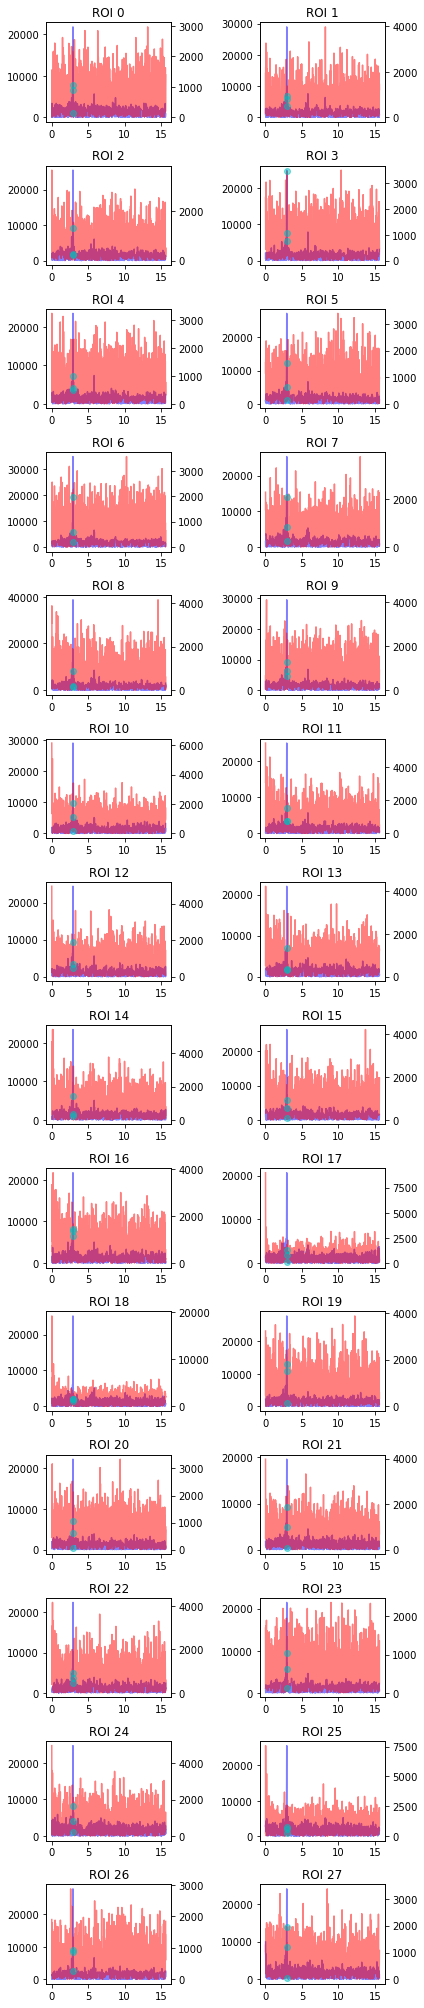

In [39]:
fig, ax = plt.subplots(len(pts)//2,2, figsize=(6,len(pts)))
ax = ax.ravel()
for count, pt in enumerate(pts):
    tt_NR = ROI.get_timetrace(movie[NR], pt, scan)
    tt_berst = ROI.get_timetrace(movie[berst], pt-shift, scan)
    
    ax[count].plot(get_rfft_wMirrorExt(tt_berst[:1400], framerate)[0][2:], 
               get_rfft_wMirrorExt(tt_berst[:1400], framerate)[1][2:], 'b', alpha=0.5)
    axt = ax[count].twinx()
    axt.plot(get_rfft_wMirrorExt(tt_NR[:1400], framerate)[0][2:], 
             get_rfft_wMirrorExt(tt_NR[:1400], framerate)[1][2:], 'r', alpha=0.5)
    axt.plot(get_rfft_wMirrorExt(tt_NR[:1400], framerate)[0][peaks_idx], 
             get_rfft_wMirrorExt(tt_NR[:1400], framerate)[1][peaks_idx], 'co', alpha=0.5)
    ax[count].set_title('ROI %d' % count)
fig.tight_layout()

In [40]:
select = []
for count, pt in enumerate(pts):
    tt_NR = ROI.get_timetrace(movie[NR], pt, scan)
    fft_before = get_rfft_wMirrorExt(tt_NR[:1400], framerate)
    fft_after = get_rfft_wMirrorExt(tt_NR[1600:], framerate)
    
    nb = fft_before[1][1:].mean()
    sb = fft_before[1][peaks_idx].mean()
    nb_std = np.std(fft_before[1][1:])
    
    na = fft_after[1][1:].mean()
    sa = fft_after[1][peaks_idx].mean()
    na_std = np.std(fft_after[1][1:])
    if (sb-nb)/nb_std > 0.3 and (sb-nb)/nb_std > (sa-na)/na_std and (sb-nb)/nb_std >0:
        print('ROI %d' % count, (sb-nb)/nb_std, (sa-na)/na_std )
        select.append(count)

ROI 3 1.44694926273 -0.212156910236
ROI 7 0.481632315168 -0.662774686533
ROI 16 0.779664312689 -1.03602669697
ROI 27 0.658692695485 -0.482120807951


In [41]:
pts[select]

array([[  72.,  140.],
       [ 112.,  216.],
       [  87.,  324.],
       [ 121.,  429.]])

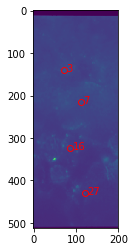

In [42]:
plt.plot(pts[select][:,0], pts[select][:,1], 'ro', fillstyle='none')
for count, pt in zip(select, pts[select]):
    plt.annotate(count, xy=pt+[5,3], color='r', fontsize=10)
plt.imshow(movie[NR].mean(0))

### Look at autocorrelation of the selected ROIs

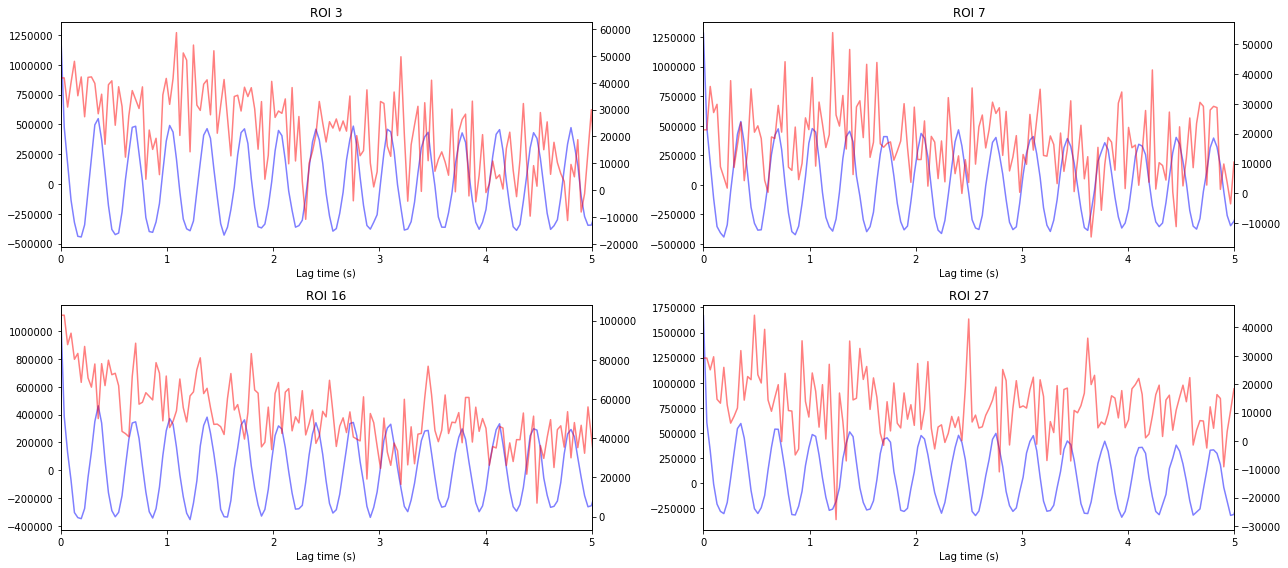

In [43]:
fig, ax = plt.subplots(len(pts[select])//2, 2, figsize=(18,len(pts[select])*2))
ax = ax.ravel()
for i, (count, pt) in enumerate(zip(select, pts[select])):
    tt_NR = ROI.get_timetrace(movie[NR], pt, scan)
    tt_berst = ROI.get_timetrace(movie[berst], pt-shift, scan)
    
    acr_berst = get_ccr_fromtt(tt_berst[:1400],tt_berst[:1400])
    acr_NR = get_ccr_fromtt(tt_NR[:1400],tt_NR[:1400])
    tau = np.arange(-(len(acr_berst)-1)/2/framerate, (len(acr_berst)-1)/2/framerate, 1/framerate)
    
    ax[i].plot(tau[1200:1600], acr_berst[1200:1600], 'b', alpha=0.5)
    axt = ax[i].twinx()
    axt.plot(np.delete(tau[1200:1600],199), np.delete(acr_NR[1200:1600],199), 'r', alpha=0.5)
    
    ax[i].set_xlim(0,5)
    ax[i].set_title('ROI %d' % count)
    ax[i].set_xlabel('Lag time (s)')
fig.tight_layout()